# Loading the dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('indian_cities_data_disability_only.csv')

In [3]:
df.head()

,Age,City,Gender,Income,Education,Occupation/Job,Geophysical Location,Tech Level,Disability,Budget,Usage Frequency
0,69,Patna,Non-binary,732454,Undergraduate degree,Unemployed,Sub-urban,Low,Mobility impairment,18638,Weekly
1,27,Pune,Non-binary,607773,Primary education,Businessperson,Sub-urban,Low,Hearing impairment,74124,Monthly
2,22,Lucknow,Female,1847149,Undergraduate degree,Teacher,Rural,Medium,Hearing impairment,86303,Monthly
3,52,Surat,Male,1238999,Postgraduate degree,Artist,Urban,High,Speech impairment,62017,Monthly
4,70,Hyderabad,Male,1378788,Secondary education,Student,Sub-urban,Low,Mobility impairment,68162,Weekly


In [4]:
df.describe()

,Age,Income,Budget
count,991.000000,9.910000e+02,991.000000
mean,48.979818,1.088459e+06,52612.204844
std,18.521503,5.483944e+05,27572.907739
min,18.000000,1.047520e+05,5003.000000
25%,33.000000,6.149150e+05,29352.000000
50%,49.000000,1.100377e+06,52031.000000
75%,65.000000,1.574736e+06,76840.000000
max,80.000000,1.996943e+06,99973.000000


# Cleaning the data 
Here we will look for missing values and then encode the categorical attributes.

In [5]:
df.isnull().sum()

Age                     0
City                    0
Gender                  0
Income                  0
Education               0
Occupation/Job          0
Geophysical Location    0
Tech Level              0
Disability              0
Budget                  0
Usage Frequency         0
dtype: int64

In [6]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# EDA
Now, let's visualize the data and see the correlation in it. We can use scatter_matrix in pandas to do this.

array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='City', ylabel='Age'>,
        <AxesSubplot: xlabel='Gender', ylabel='Age'>,
        <AxesSubplot: xlabel='Income', ylabel='Age'>,
        <AxesSubplot: xlabel='Education', ylabel='Age'>,
        <AxesSubplot: xlabel='Occupation/Job', ylabel='Age'>,
        <AxesSubplot: xlabel='Geophysical Location', ylabel='Age'>,
        <AxesSubplot: xlabel='Tech Level', ylabel='Age'>,
        <AxesSubplot: xlabel='Disability', ylabel='Age'>,
        <AxesSubplot: xlabel='Budget', ylabel='Age'>,
        <AxesSubplot: xlabel='Usage Frequency', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='City'>,
        <AxesSubplot: xlabel='City', ylabel='City'>,
        <AxesSubplot: xlabel='Gender', ylabel='City'>,
        <AxesSubplot: xlabel='Income', ylabel='City'>,
        <AxesSubplot: xlabel='Education', ylabel='City'>,
        <AxesSubplot: xlabel='Occupation/Job', ylabel='City'>,
        <AxesSubplot: xlabel='Ge

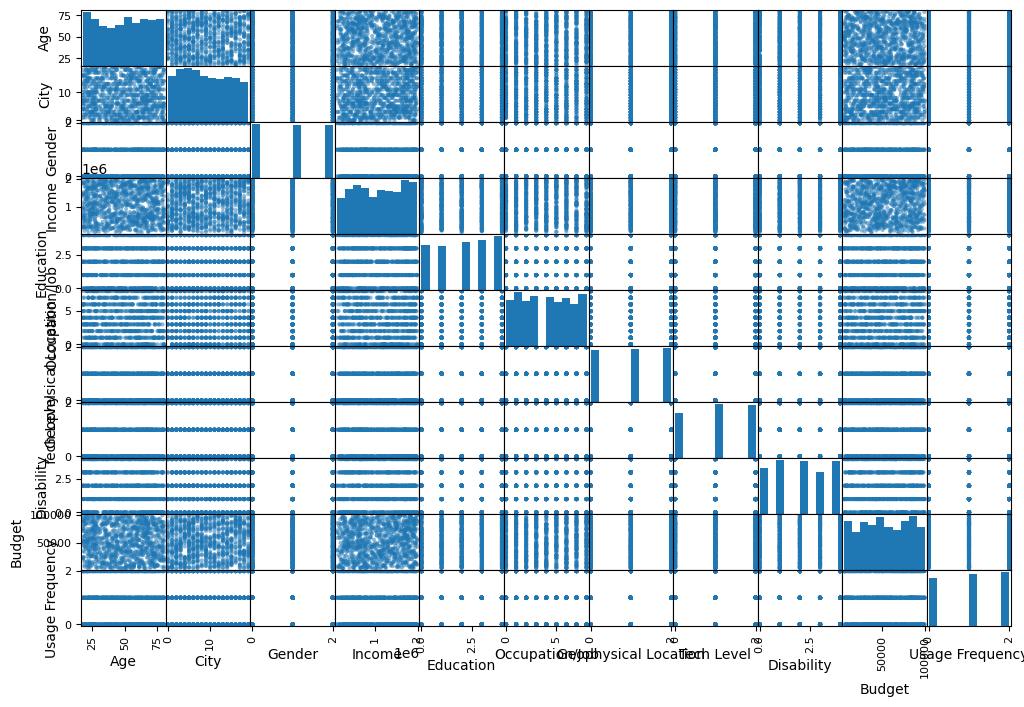

In [8]:
from pandas.plotting import scatter_matrix
attributes = df.columns
scatter_matrix(df[attributes], figsize=(12, 8))


# Preprocessing the dataset 
Here we standardize the columns to make them fall in a comparable range

In [9]:
df.head()

,Age,City,Gender,Income,Education,Occupation/Job,Geophysical Location,Tech Level,Disability,Budget,Usage Frequency
0,69,13,2,732454,4,8,1,1,2,18638,2
1,27,15,2,607773,2,1,1,1,1,74124,1
2,22,10,0,1847149,4,6,0,2,1,86303,1
3,52,16,1,1238999,1,0,2,0,3,62017,1
4,70,5,1,1378788,3,5,1,1,2,68162,2


In [10]:
columns = df.columns
x = df.loc[:, columns].values
df = StandardScaler().fit_transform(x)

In [11]:
df = pd.DataFrame(df, columns=columns)

In [12]:
df.head()

,Age,City,Gender,Income,Education,Occupation/Job,Geophysical Location,Tech Level,Disability,Budget,Usage Frequency
0,1.081461,0.681391,1.230637,-0.649506,1.338742,1.552991,-0.014862,-0.070492,-0.009321,-1.232781,1.187711
1,-1.187318,1.033547,1.230637,-0.876977,-0.068144,-1.142980,-0.014862,-0.070492,-0.719873,0.780573,-0.043483
2,-1.457411,0.153158,-1.218281,1.384173,1.338742,0.782714,-1.242222,1.176958,-0.719873,1.222497,-0.043483
3,0.163146,1.209625,0.006178,0.274648,-0.771587,-1.528118,1.212498,-1.317942,0.701230,0.341260,-0.043483
4,1.135480,-0.727232,0.006178,0.529683,0.635299,0.397575,-0.014862,-0.070492,-0.009321,0.564237,1.187711
